Data generated with GetGammaSteadyState.py

In [47]:
import tensorflow as tf
from functionsTF import *
from functions import *
from IO import *

%load_ext autoreload
%autoreload 2

import time
import numpy as np
import matplotlib
%matplotlib inline
import pylab as plt
import seaborn as sns
#Imports for visualization
import PIL.Image
from io import BytesIO
from IPython.display import clear_output, Image, display

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


[autoreload of functionsTF failed: Traceback (most recent call last):
  File "/mnt/DATA/gp1514/.pyenv/versions/anaconda3-4.1.0/lib/python3.5/site-packages/IPython/extensions/autoreload.py", line 247, in check
    superreload(m, reload, self.old_objects)
argparse.ArgumentError: argument --summaries_dir: conflicting option string: --summaries_dir
]


In [39]:
import mutual_info

In [40]:
'''
Read the data file and compile them into a pandas dataframe 
'''
df = pd.DataFrame(columns=('tauv', 'g', 'k', 'T', 'N', 'freq', 'power', 'gSteady') )
d = 500
i=-1
sigma = 1
for T in [20000]:
    for k in range(0,50,5):
        for N in [100, 1000]:
            for g in [7]:
                for tauv in np.arange(15,90,5):
                    i+=1
                    filename = "../data/GetGammaSteadyState/GetSteadyState-tauv-%d_g-%d_N-%d_T-%d_k-%d" % (tauv, g, N, T, k)
                    a = np.load(filename)
                    df.loc[i] = [int(tauv), int(g), int(k), int(T), int(N), 
                                a['freq'], a['power'], np.mean(a['gamma'][-2000:])]

In [41]:
df.to_csv('gSteady.csv')

In [42]:
def facet_heatmap(data, df=None, v=0, vmin=None, vmax=None, **kws):
    kind = data['variable'].get_values()[0][:-1]
    if vmin == None:
        vmin, _ = vmin_vmax(df, kind=kind, v=v)
    if vmax == None:
        _, vmax = vmin_vmax(df, kind=kind, v=v)
    data = data.pivot(index='k', columns='g', values='value')
    im = sns.heatmap(data, yticklabels=10, xticklabels=10, vmin=vmin, vmax=vmax, **kws)  # <-- Pass kwargs to heatmap
    im.invert_yaxis()
    
def plotGridHeatmap(df, col_wrap=2, cols=['burst1', 'spike1', 'burst2', 'spike2'], v=-1, vmin=None, vmax=None, **kws):
    data = pd.melt(df, id_vars=['k', 'g'], value_vars=cols)
    #     print(data.head())
    with sns.plotting_context(font_scale=5.5):
        g = sns.FacetGrid(data, col="variable", col_wrap=col_wrap, size=3, aspect=1)

    cbar_ax = g.fig.add_axes([.92, .3, .02, .4])  # <-- Create a colorbar axes
    g = g.map_dataframe(facet_heatmap, v=v, df=df, vmin=vmin, vmax=vmax,
                        cbar_ax=cbar_ax, **kws)  # <-- Specify the colorbar axes and limits
    g.set_titles(col_template="{col_name}", fontweight='bold', fontsize=18)
    g.fig.subplots_adjust(right=.9)  # <-- Add space so the colorbar doesn't overlap the plot
    return g

def plotHeatmap(df, col="cor1", title='', cmap=None, **kws):
    plt.figure()
    '''
    plot heatmap using seaborn library
    '''
    burst = df[['k', 'tauv', col]]
    burst.loc[:, (col)] = burst[col].astype(float)
    burst.loc[:,('k')] = burst['k'].astype(int)
    burst.loc[:,('tauv')] = burst['tauv'].astype(int)
    c = burst.pivot('k','tauv', col)


    im = sns.heatmap(c, yticklabels=5, xticklabels=2, cmap=cmap, **kws)
    im.invert_yaxis()
    sns.set_style("whitegrid")
    if not title:
        title=col
    plt.title(title)
    return 0

In [43]:
df.head()

,tauv,g,k,T,N,freq,power,gSteady
0,15.0,7.0,0.0,20000.0,100.0,69.53376205787781,-0.7470211408356625,5.230364
1,20.0,7.0,0.0,20000.0,100.0,63.90675241157555,0.33325740665374187,5.310041
2,25.0,7.0,0.0,20000.0,100.0,57.07395498392282,2.2255468160433955,5.386736
3,30.0,7.0,0.0,20000.0,100.0,53.85852090032153,3.090364979349278,5.412436
4,35.0,7.0,0.0,20000.0,100.0,50.64308681672025,3.6535244370463027,5.323642


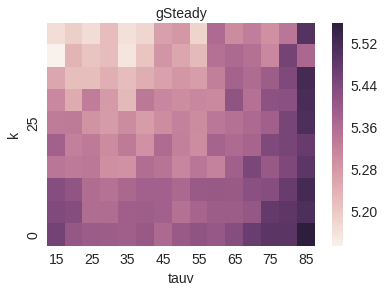

In [46]:
plotHeatmap(df[df['N']==1000], col='gSteady')
plt.savefig(DIRECTORY + 'gSteady.pdf')

In [36]:
def getGSteady(tauv, k, N=100):
    '''
    Get steady state value of the gap junction strenght
    '''
    df = pd.read_csv('gSteady.csv')
    df2 = df[(df['tauv']==tauv) & (df['k']==k) & (df['N']==N)]
    return df2['gSteady'].values[0]

In [49]:
getGSteady(20,5, 1000)

5.4343697770964345